In [1]:
import numpy as np
import pandas as pd
import prep_data_2
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Define Paths
train_csv_path = "C:/Users/joshc/OneDrive/Documents/01 Trying too hard/Machine Learning and AI/Kaggle/titanic/Datasets/train.csv"
summary_stats_path = "C:/Users/joshc/OneDrive/Documents/01 Trying too hard/Machine Learning and AI/Kaggle/titanic/Datasets/summary stats.txt"
final_test_csv_path = "C:/Users/joshc/OneDrive/Documents/01 Trying too hard/Machine Learning and AI/Kaggle/titanic/Datasets/test.csv"


In [3]:
data_df = prep_data_2.main(train_csv_path=train_csv_path)

y_feature = "Survived"
X_features = ['Age', 'Fare', 'female', 'no friends or family', '10^class']
X = data_df[X_features]
y = data_df[y_feature]

In [6]:
# Define model
model = RandomForestClassifier()

# Define seach space
search_space = {}
search_space["n_estimators"] = np.linspace(10, 300, 30, dtype=int)
search_space["min_samples_leaf"] = np.linspace(5, 30, 10, dtype=int)

In [8]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1234)
search = GridSearchCV(model, 
                      search_space,
                      cv=rskf,
                      scoring='accuracy', 
                      verbose=1,
                      n_jobs=-1,
                      return_train_score=True)
result = search.fit(X, y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [50]:
search_results = pd.concat([pd.DataFrame(result.cv_results_["params"]),
                            pd.DataFrame(result.cv_results_["mean_test_score"],
                           columns=['mean_test_score'])], 
                           axis=1)
search_results

,min_samples_leaf,n_estimators,mean_test_score
0,5,10,0.814795
1,5,20,0.815944
2,5,30,0.814826
3,5,40,0.817055
4,5,50,0.822673
...,...,...,...
295,30,260,0.791250
296,30,270,0.790126
297,30,280,0.783385
298,30,290,0.783378


In [125]:
x = np.array(search_results["min_samples_leaf"])
y = np.array(search_results["n_estimators"])
z = np.array(search_results["mean_test_score"])

shape = (10, 30)

# x_cont = np.array([np.unique(x) for _ in range(shape[1])]).transpose()
# y_cont = np.array([np.unique(y) for _ in range(shape[0])])

x_cont, y_cont = np.meshgrid(np.unique(y), np.unique(x))
z_cont = np.reshape(z, shape)

print(x_cont.shape)

(10, 30)


C:\Users\joshc\AppData\Local\Temp\ipykernel_29324\3006784709.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



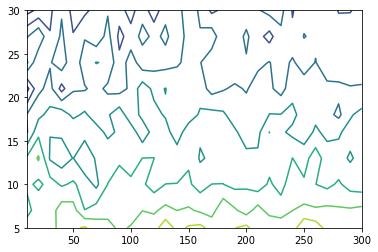

In [127]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

ax.contour(x_cont, y_cont, z_cont)
fig.show()

True


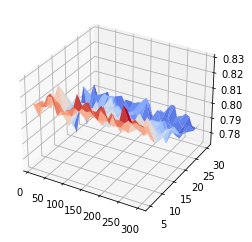

In [130]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
print(x_cont.shape == y_cont.shape == z_cont.shape)

ax.plot_surface(x_cont, y_cont, z_cont, cmap=cm.coolwarm)
